In [1]:
import math
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

## Центральная предельная теорема и полукруговое распределение Вигнера

**Полукруговой закон** (или **распределение**) **Вигнера** — названное в честь физика Юджина Вигнера абсолютно непрерывное распределение вероятностей на прямой, график плотности которого получается после нормировки из полукруга, построенном на отрезке $[-R,R]$ как на диаметре (тем самым, на самом деле график плотности оказывается полу-эллипсом):

$\rho(x)=\frac{2}{\pi R^2} \sqrt{R^2-x^2}$,

если $x\in [-R,R]$, и $\rho(x)=0$ иначе.

Это распределение было предложено Вигнером в 1955 году в связи с его исследованиями в области квантовой механики, как предельное распределение собственных значений для случайной эрмитовой матрицы большого размера.

Сгенерируем выборку объёма 1000 из распределения Вигнера с $R=2$:

In [2]:
R = 2
sc_rv = sts.semicircular(scale=R)
sample = sc_rv.rvs(1000)

Построим гистограмму выборки и график теоретической плотности распределения случайной величины. Для удобства, вынесем этот код в отдельную функцию, она потребудется нам в дальнейшем при исследовании ЦПТ.

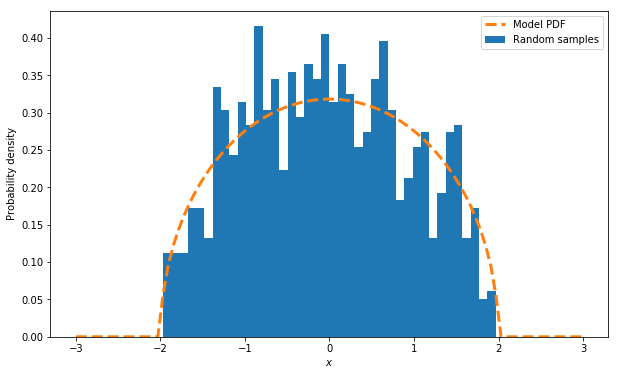

In [3]:
def plot((x, y), samples):
    plt.hist(samples, bins=40, normed=True, label="Random samples")
    plt.plot(x, y, '--', lw=3, label="Model PDF")
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('Probability density')

x = np.linspace(-3, 3, 100)
pdf = sc_rv.pdf(x)
plot((x, pdf), sample)


Оценим распределение выборочного среднего случайной величины при разных объемах выборок. Для этого сначала определим функцию, которая сгенерирует массив средних значений для 1000 выборок заданного размера:

In [4]:
def gen_mean(n):
    return [np.mean(sc_rv.rvs(n)) for i in range(0, 1000)]

По ЦПТ, выборочные средние описываются нормальным распределением со следующими параметрами:

$\bar{X}_n\approx\sim \mathbb{N}(\mathbb{E}X, \frac{\mathbb{D}X}{n})$,

где, для распределения Вигнера, $\mathbb{E}=0$ и $\mathbb{D}=\frac{R^2}{4}$.

Определим функцию, генерирующую данные для построения графика теоретической плотности распределения при заданном объеме выборки:

In [5]:
def gen_norm(n):
    norm_rv = sts.norm(0, math.sqrt(float(R*R)/4/n))
    x = np.linspace(-1.5, 1.5, 100)
    return x, norm_rv.pdf(x)

Потсроим гистограммы распределения выборочных средних и графики теоретической плотности распределения для выборок разного размера.

Для выборки размера $n=5$:

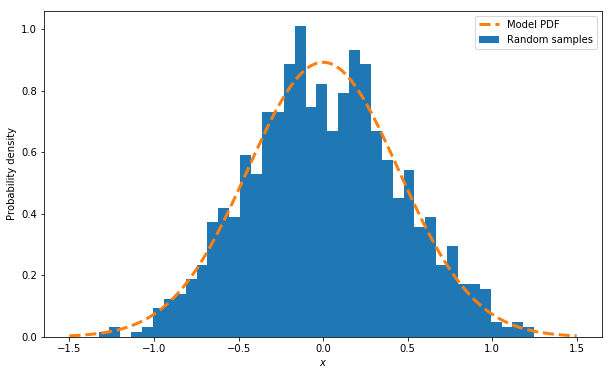

In [6]:
plot(gen_norm(5), gen_mean(5))

Для выборки размера $n=10$:

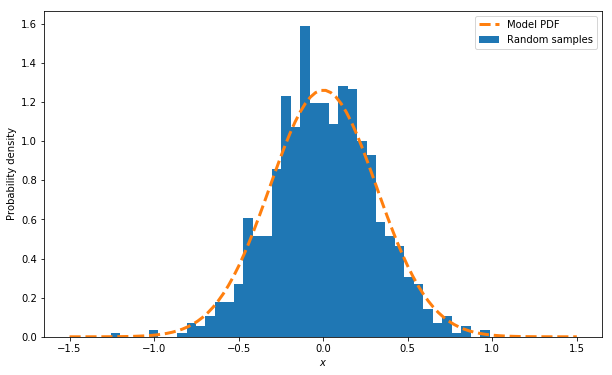

In [7]:
plot(gen_norm(10), gen_mean(10))

Для выборки размера $n=50$:

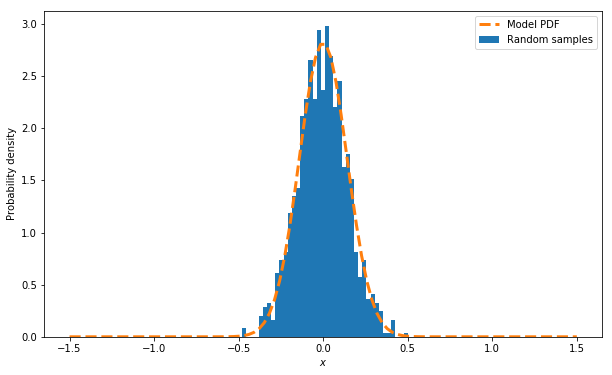

In [8]:
plot(gen_norm(50), gen_mean(50))

### Выводы
Как видно из графиков, при выборках недостаточного размера (5 и 10 элементов), нормально распределение недостаточно точно аппроксимирует средние значения выборок. При росте количества элементов в выборках, точнось аппроксимации существенно возрастает.